In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 1

In [29]:
# Load the dataset
data = pd.read_csv('Default.csv')

RANDON_SEED = 390

# Set a random seed
np.random.seed(RANDON_SEED)

# Split the data into training and validation sets
train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED)

# Define the features and the target variable
X_train = train_data[['income', 'balance']]
y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
X_validation = validation_data[['income', 'balance']]
y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)

# Fit a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the posterior probabilities on the validation set
y_prob = model.predict_proba(X_validation)[:, 1]

# Classify individuals to the default category if the posterior probability is greater than 0.5
y_pred = (y_prob > 0.5).astype(int)

# Calculate the test error on the validation set
test_error = 1 - accuracy_score(y_validation, y_pred)

print(f'Test Error: {round(test_error, 4)}')

Test Error: 0.024


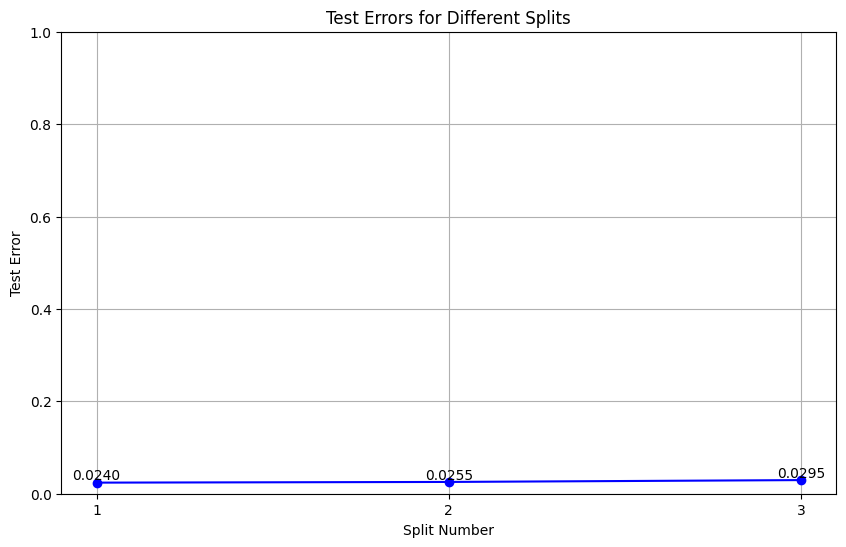

Average Test Error: 0.0263
Standard Deviation of Test Errors: 0.0023
Test Errors for each split: [0.024, 0.0255, 0.0295]


In [33]:
# Define the number of repetitions
REPEAT_TIMES = 3

# Store the test errors for each split
test_errors = []

for i in range(REPEAT_TIMES):
    # Split the data into training and validation sets
    train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED + i)
    
    # Define the features and the target variable
    X_train = train_data[['income', 'balance']]
    y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_validation = validation_data[['income', 'balance']]
    y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Fit a logistic regression model on the training set
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict the posterior probabilities on the validation set
    y_prob = model.predict_proba(X_validation)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred = (y_prob > 0.5).astype(int)
    
    # Calculate the test error on the validation set
    test_error = 1 - accuracy_score(y_validation, y_pred)
    test_errors.append(test_error)
    
    # print(f'Test Error for split {i+1}: {round(test_error, 4)}')

# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, REPEAT_TIMES + 1), test_errors, marker='o', linestyle='-', color='b')

# Add test error values for each data point
for i, error in enumerate(test_errors):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='bottom')

plt.title('Test Errors for Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Test Error')
plt.ylim(0, 1)
plt.yticks([round(x * 0.2, 4) for x in range(0, 6, 1)])
plt.xticks(range(1, REPEAT_TIMES + 1))
plt.grid(True)
plt.show()

# Describe the findings
average_test_error = np.mean(test_errors)
print(f'Average Test Error: {round(average_test_error, 4)}')

std_test_error = np.std(test_errors)
print(f'Standard Deviation of Test Errors: {round(std_test_error, 4)}')

rounded_test_errors = [round(error, 4) for error in test_errors]
print(f'Test Errors for each split: {rounded_test_errors}')

Test Error with student for split 1: 0.0245
Test Error without student for split 1: 0.024
Test Error with student for split 2: 0.0255
Test Error without student for split 2: 0.0255
Test Error with student for split 3: 0.031
Test Error without student for split 3: 0.0295
Average Test Error with student: 0.027
Average Test Error without student: 0.0263
Standard Deviation of Test Errors with student: 0.0029
Standard Deviation of Test Errors without student: 0.0023


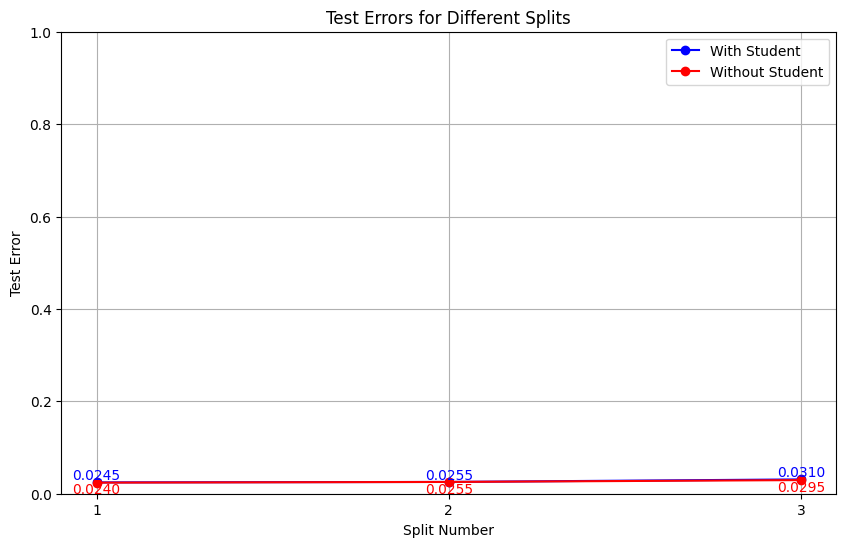

In [37]:
# Load the dataset
data = pd.read_csv('Default.csv')

# Create dummy variables for the 'student' column
data = pd.get_dummies(data, columns=['student'], drop_first=True)

# Define the number of repetitions
REPEAT_TIMES = 3

# Store the test errors for each split
test_errors_with_student = []
test_errors_without_student = []

for i in range(REPEAT_TIMES):
    # Split the data into training and validation sets
    train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED + i)
    
    # Define the features and the target variable
    X_train_with_student = train_data[['income', 'balance', 'student_Yes']]
    X_train_without_student = train_data[['income', 'balance']]
    y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_validation_with_student = validation_data[['income', 'balance', 'student_Yes']]
    X_validation_without_student = validation_data[['income', 'balance']]
    y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Fit a logistic regression model on the training set with student variable
    model_with_student = LogisticRegression()
    model_with_student.fit(X_train_with_student, y_train)
    
    # Predict the posterior probabilities on the validation set with student variable
    y_prob_with_student = model_with_student.predict_proba(X_validation_with_student)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred_with_student = (y_prob_with_student > 0.5).astype(int)
    
    # Calculate the test error on the validation set with student variable
    test_error_with_student = 1 - accuracy_score(y_validation, y_pred_with_student)
    test_errors_with_student.append(test_error_with_student)
    
    # Fit a logistic regression model on the training set without student variable
    model_without_student = LogisticRegression()
    model_without_student.fit(X_train_without_student, y_train)
    
    # Predict the posterior probabilities on the validation set without student variable
    y_prob_without_student = model_without_student.predict_proba(X_validation_without_student)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred_without_student = (y_prob_without_student > 0.5).astype(int)
    
    # Calculate the test error on the validation set without student variable
    test_error_without_student = 1 - accuracy_score(y_validation, y_pred_without_student)
    test_errors_without_student.append(test_error_without_student)
    
    print(f'Test Error with student for split {i+1}: {round(test_error_with_student, 4)}')
    print(f'Test Error without student for split {i+1}: {round(test_error_without_student, 4)}')

# Calculate average test errors
average_test_error_with_student = np.mean(test_errors_with_student)
average_test_error_without_student = np.mean(test_errors_without_student)

# Calculate standard deviation of test errors
std_test_error_with_student = np.std(test_errors_with_student)
std_test_error_without_student = np.std(test_errors_without_student)

print(f'Average Test Error with student: {round(average_test_error_with_student, 4)}')
print(f'Average Test Error without student: {round(average_test_error_without_student, 4)}')
print(f'Standard Deviation of Test Errors with student: {round(std_test_error_with_student, 4)}')
print(f'Standard Deviation of Test Errors without student: {round(std_test_error_without_student, 4)}')

# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, REPEAT_TIMES + 1), test_errors_with_student, marker='o', linestyle='-', color='b', label='With Student')
plt.plot(range(1, REPEAT_TIMES + 1), test_errors_without_student, marker='o', linestyle='-', color='r', label='Without Student')

# Add test error values for each data point
for i, error in enumerate(test_errors_with_student):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='bottom', color='b')
for i, error in enumerate(test_errors_without_student):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='top', color='r')

plt.title('Test Errors for Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Test Error')
plt.ylim(0, 1)
plt.yticks([round(x * 0.2, 1) for x in range(0, 6)])
plt.xticks(range(1, REPEAT_TIMES + 1))
plt.grid(True)
plt.legend()
plt.show()

# 2

βˆ0 = −15.05

βˆstudentYes = -0.5149

βˆbalance = 0.003738

βˆincome = −0.00000791

In [42]:
# Given coefficients
beta_0 = -15.05
beta_studentYes = -0.5149
beta_balance = 0.003738
beta_income = -0.00000791

In [43]:
# Given values for the student
studentYes = 1  # 1 if the customer is a student, 0 otherwise
balance = 3000
income = 70000

# Calculate the logit
logit_p = beta_0 + beta_studentYes * studentYes + beta_balance * balance + beta_income * income

# Calculate the probability
probability = 1 / (1 + np.exp(-logit_p))

print(f'The estimated probability that a student with a balance of $3,000 and income $70,000 does default on a loan is {probability:.4f}')

The estimated probability that a student with a balance of $3,000 and income $70,000 does default on a loan is 0.0074


In [44]:
# Given values for the non-student
studentYes = 0  # 1 if the customer is a student, 0 otherwise
balance = 3000
income = 70000

# Calculate the logit
logit_p = beta_0 + beta_studentYes * studentYes + beta_balance * balance + beta_income * income

# Calculate the probability
probability = 1 / (1 + np.exp(-logit_p))

print(f'The estimated probability that a non-student with a balance of $3,000 and income $70,000 does default on a loan is {probability:.4f}')

The estimated probability that a non-student with a balance of $3,000 and income $70,000 does default on a loan is 0.0123


In [45]:
# Given values for the student
studentYes = 1  # 1 if the customer is a student, 0 otherwise
balance = 3000
logit_p = -2.1972  # logit(0.10)

# Calculate the required income
income = (logit_p - beta_0 - beta_studentYes * studentYes - beta_balance * balance) / beta_income

print(f'The student would need to make an income of ${income:.2f} to have a 90% chance of getting approved for a loan.')

The student would need to make an income of $-272275.60 to have a 90% chance of getting approved for a loan.


In [46]:
# Given values for the non-student
studentYes = 0  # 1 if the customer is a student, 0 otherwise
balance = 3000
logit_p = -2.1972  # logit(0.10)

# Calculate the required income
income = (logit_p - beta_0 - beta_studentYes * studentYes - beta_balance * balance) / beta_income

print(f'The non-student borrower would need to make an income of ${income:.2f} to have a 90% chance of getting approved for a loan.')

The non-student borrower would need to make an income of $-207180.78 to have a 90% chance of getting approved for a loan.


# 3